In [0]:
!pip install fastai

In [5]:
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar

--2018-07-27 05:43:34--  http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar [following]
--2018-07-27 05:43:34--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  41.9MB/s    in 11s     

2018-07-27 05:43:45 (40.0 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



In [6]:
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip

--2018-07-27 05:43:48--  https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1998182 (1.9M) [application/zip]
Saving to: ‘PASCAL_VOC.zip’

PASCAL_VOC.zip      100%[===================>]   1.91M  --.-KB/s    in 0.02s   

2018-07-27 05:43:48 (92.6 MB/s) - ‘PASCAL_VOC.zip’ saved [1998182/1998182]



In [0]:
!tar -xf VOCtrainval_06-Nov-2007.tar

In [8]:
!unzip PASCAL_VOC.zip

Archive:  PASCAL_VOC.zip
   creating: PASCAL_VOC/
  inflating: PASCAL_VOC/pascal_test2007.json  
  inflating: PASCAL_VOC/pascal_train2007.json  
  inflating: PASCAL_VOC/pascal_train2012.json  
  inflating: PASCAL_VOC/pascal_val2007.json  
  inflating: PASCAL_VOC/pascal_val2012.json  


In [0]:
import json
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from fastai.dataset import *
from matplotlib import patches, patheffects

In [0]:
train_json = json.load(Path('PASCAL_VOC/pascal_train2007.json').open())

In [144]:
train_json.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [0]:
IMAGES,TYPE,ANNOTATIONS,CATEGORIES = ['images', 'type', 'annotations', 'categories']

In [146]:
train_json[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [147]:
train_json[ANNOTATIONS][:3]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]},
 {'area': 81326,
  'bbox': [89, 77, 314, 259],
  'category_id': 13,
  'id': 3,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[89, 77, 89, 336, 403, 336, 403, 77]]}]

In [148]:
train_json[CATEGORIES][:5]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'},
 {'id': 5, 'name': 'bottle', 'supercategory': 'none'}]

In [0]:
FILE_NAME,ID,IMAGE_ID,BBOX = 'file_name','id','image_id','bbox'

In [0]:
cats = {o[ID]: o['name'] for o in train_json[CATEGORIES]}
train_file_names = {o[ID]: o[FILE_NAME] for o in train_json[IMAGES]}
train_ids = [o[ID] for o in train_json[IMAGES]]

In [151]:
list(Path('VOCdevkit/VOC2007/JPEGImages').iterdir())[0]

PosixPath('VOCdevkit/VOC2007/JPEGImages/001669.jpg')

In [152]:
train_json[IMAGES][0]

{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500}

In [153]:
train_json[ANNOTATIONS][0]

{'area': 34104,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0,
 'image_id': 12,
 'iscrowd': 0,
 'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]}

In [0]:
def bb_hw(bb): return np.array([bb[1],bb[0],bb[3]+bb[1]-1,bb[2]+bb[0]-1]) 
def hw_bb(bb): return np.array([bb[1],bb[0],bb[3]-bb[1]+1,bb[2]-bb[0]+1]) 

In [0]:
train_anno = {}
train_anno = collections.defaultdict(lambda:[])

for o in train_json[ANNOTATIONS]:
    if not o['ignore']:
        box = bb_hw(o['bbox'])
        train_anno[o['image_id']].append((box,o['category_id']))

In [156]:
train_anno[12]

[(array([ 96, 155, 269, 350]), 7)]

In [157]:
cats[7]

'car'

In [158]:
train_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [0]:
im = open_image('VOCdevkit/VOC2007/JPEGImages/000017.jpg')

In [0]:
def show_img(img,figsize = (8,8),ax = None):
    if ax is None: fig,ax = plt.subplots(figsize = figsize)
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [0]:
def draw_rect(ax,bb):
    rect = ax.add_patch(patches.Rectangle(bb[:2],*bb[-2:],fill=False, edgecolor='white', lw=2))
    draw_outline(rect,8)

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(linewidth=lw, foreground='black'), patheffects.Normal()])

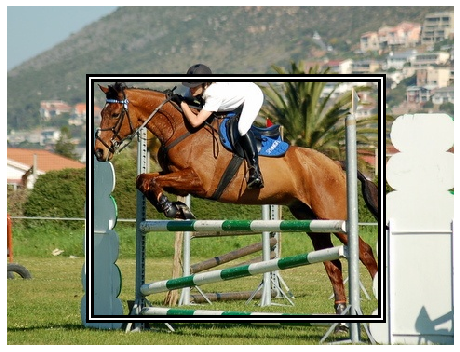

In [163]:
ax = show_img(im)
draw_rect(ax, [89, 77, 314, 259])

In [0]:
PATH_IMG = Path('VOCdevkit/VOC2007/JPEGImages')

In [0]:
def draw_img(im,ann):
    ax = show_img(im)
    for b,l in ann:
        draw_rect(ax,hw_bb(b))
        draw_text(ax,b[:2][::-1],cats[l])

In [0]:
def draw_idx(ix):
    im = open_image(PATH_IMG/train_file_names[ix])
    draw_img(im,train_anno[ix])
    

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

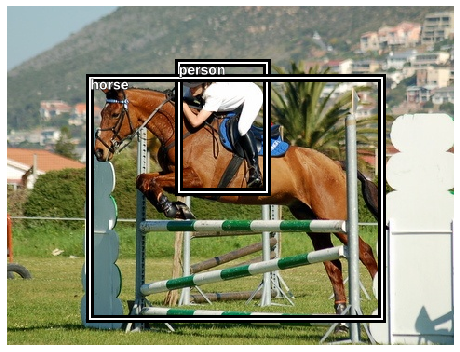

In [168]:
draw_idx(17)

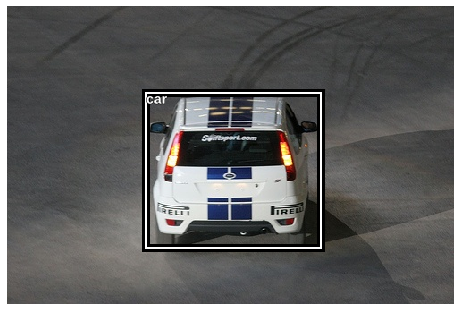

In [169]:
draw_idx(12)

In [170]:
train_anno[12][0][0]

array([ 96, 155, 269, 350])

In [171]:
(269-96 + 1) * (350-155 + 1)

34104

In [172]:
269-96 + 1,350-155 + 1

(174, 196)

In [0]:
def get_largest(a,b):
    if not b: 
        print(a)
        return
    b = sorted(b, key=lambda x: np.product((x[0][-2:]+1)-(x[0][:2] +1)), reverse=True)
    return b[0]

In [174]:
get_largest(2,train_anno[17])

(array([ 77,  89, 335, 402]), 13)

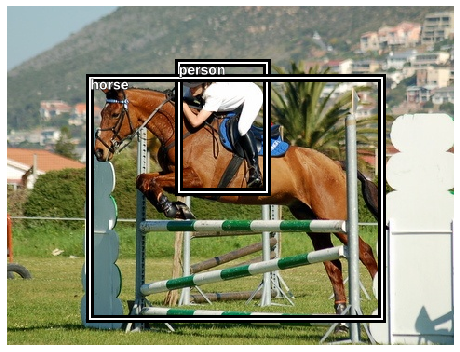

In [175]:
draw_idx(17)

In [176]:
cats[13]

'horse'

In [177]:
train_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [0]:
train_largest_anno = {a: get_largest(a,b) for a,b in train_anno.items()}

In [179]:
train_largest_anno[17]

(array([ 77,  89, 335, 402]), 13)

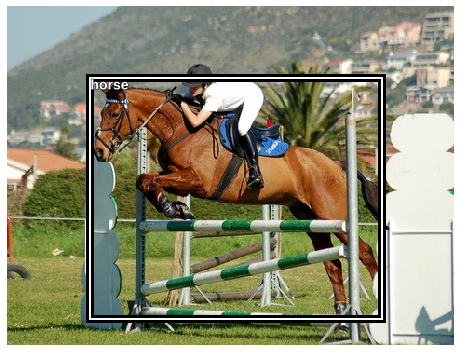

In [180]:
im = open_image(PATH_IMG/train_file_names[17])
draw_img(im,[train_largest_anno[17]])

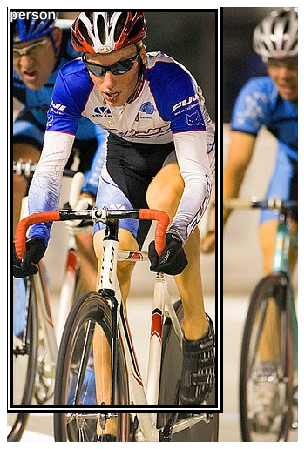

In [181]:
im = open_image(PATH_IMG/train_file_names[23])
draw_img(im,[train_largest_anno[23]])

In [0]:
df = pd.DataFrame({'fn': [train_file_names[o] for o in train_ids],
                'cat': [cats[train_largest_anno[o][1]] for o in train_ids]}, columns=['fn','cat'])

In [183]:
df.head()

,fn,cat
0,000012.jpg,car
1,000017.jpg,horse
2,000023.jpg,person
3,000026.jpg,car
4,000032.jpg,aeroplane


In [0]:
df.to_csv('largest.csv',index = False)

In [0]:
from fastai.conv_learner import *

In [0]:
f_model = resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv('', PATH_IMG, 'largest.csv', tfms=tfms, bs=bs)

In [0]:
x,y=next(iter(md.val_dl))

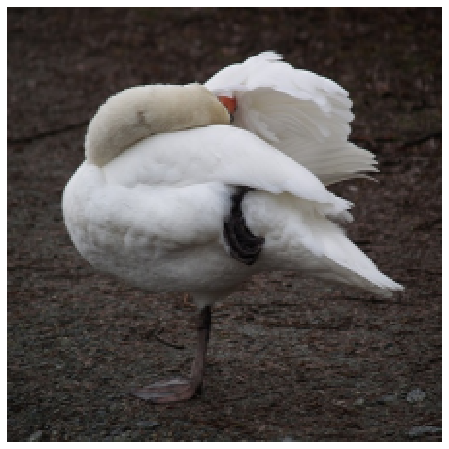

In [189]:
show_img(md.val_ds.denorm(to_np(x))[2]);

In [0]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [191]:
learn.lr_find()

 91%|█████████ | 29/32 [00:19<00:02,  1.49it/s, loss=12.7]

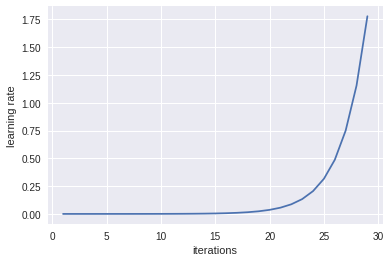

In [192]:
learn.sched.plot_lr()

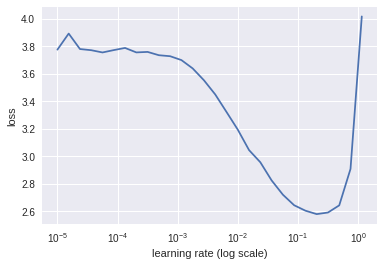

In [193]:
learn.sched.plot(n_skip = 0,n_skip_end = 0)

In [194]:
learn.fit(2e-2 , 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.329016   0.68599    0.806     


[array([0.68599]), 0.8060000009536743]

In [0]:
x,y = next(iter(md.val_dl))
preds = F.softmax(predict_batch(learn.model,x),-1)
x,preds = to_np(x),to_np(preds)
preds = np.argmax(preds,-1)

In [0]:
n_rows = 2
n_cols = 6
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize = (18,8))
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        img = md.val_ds.denorm(x)[n_rows*i+j]
        txt = md.classes[preds[n_rows*i+j]]
        ax = show_img(img,ax = col)
        draw_outline(ax.text(0,0,txt,verticalalignment='top', color='white', fontsize=15, weight='bold'),3)

#    

# Bounding Box

In [0]:
bb = [train_largest_anno[o][0] for o in train_ids]

In [43]:
bb[:5]

[array([ 96, 155, 269, 350]),
 array([ 77,  89, 335, 402]),
 array([  1,   2, 461, 242]),
 array([124,  89, 211, 336]),
 array([ 77, 103, 182, 374])]

In [0]:
bbs = [ ' '.join(str(p) for p in o) for o in bb]

In [0]:
bbox = pd.DataFrame({'fn': [ train_file_names[o] for o in train_ids],
             'bbox':bbs},columns = ['fn','bbox'])

In [0]:
bbox.to_csv('bbox.csv',index = False)

In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
augs=[RandomFlip(tfm_y= TfmType.COORD),
      RandomRotate(3,tfm_y=TfmType.COORD),
      RandomLighting(0.05,0.05, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv('',PATH_IMG,'bbox.csv', tfms=tfms, continuous=True, bs=4)

In [0]:
fig,axes = plt.subplots(3,3,figsize = (9,9))
idx = 3
for row in axes:
    for col in row:
        x,y = next(iter(md.aug_dl))
        im = md.val_ds.denorm(to_np(x))[idx]
        b = hw_bb(to_np(y[idx]))
        show_img(im,ax = col)
        draw_rect(col,b)

In [0]:
head_reg = nn.Sequential(Flatten(),
                         nn.Linear(512*7*7,4))

In [0]:
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg)

In [0]:
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [0]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

In [0]:
learn.lr_find()

 66%|██████▌   | 330/501 [04:41<02:25,  1.17it/s, loss=156] 

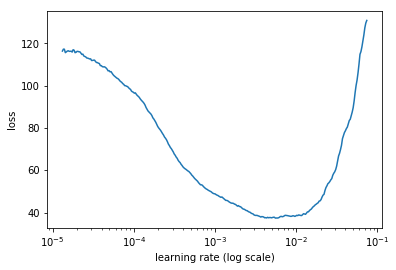

In [0]:
learn.sched.plot()

In [0]:
lr = 1e-3

In [0]:
learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss                              
    0      27.720908  27.338383 
    1      26.115404  26.386847                             


[array([26.38685])]

In [0]:
learn.freeze_to(-3)

In [0]:
learn.lr_find()

 84%|████████▍ | 423/501 [15:38<02:53,  2.22s/it, loss=105] 

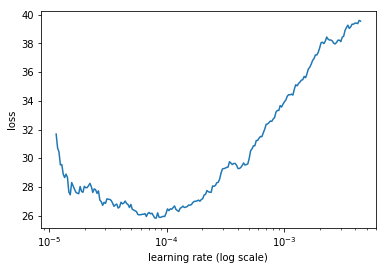

In [0]:
learn.sched.plot(5,n_skip_end=200)

In [0]:
lr = 1e-3

In [0]:
lrs = np.array([lr/100,lr/10,lr])

In [0]:
learn.fit(lrs,1, cycle_len=1)

epoch      trn_loss   val_loss                              
    0      23.545993  25.50598  


[array([25.50598])]

In [0]:
learn.save('4_out')

In [0]:
x,y = next(iter(md.val_dl))

In [0]:
preds = predict_batch(learn.model,x)

In [0]:
to_np(preds)

array([[ 27.49604,  33.1292 , 226.6189 , 238.93523],
       [ 83.0931 ,  -2.49211, 237.58455, 195.61122],
       [ 44.73415,  34.28705, 210.21469, 199.46655],
       [ 62.18647,  44.37206, 251.85713, 194.15448]], dtype=float32)

In [0]:
fig,axes = plt.subplots(2,2,figsize = (8,8))
idx = 0
for row in axes:
    for col in row:
        im = md.val_ds.denorm(x)[idx]
        b = to_np(preds)[idx]
        show_img(im,ax = col)
        draw_rect(col,hw_bb(b))
        idx+=1

In [0]:
augs=[RandomFlip(tfm_y= TfmType.COORD),
      RandomRotate(3,tfm_y=TfmType.COORD),
      RandomLighting(0.05,0.05, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
val_idxs = get_cv_idxs(len(train_file_names))
md = ImageClassifierData.from_csv('',PATH_IMG,'bbox.csv', tfms=tfms, continuous=True,bs = bs,val_idxs=val_idxs)
md2 = ImageClassifierData.from_csv('',PATH_IMG,'largest.csv', tfms=tfms_from_model(f_model,sz),bs = bs)

In [0]:
class ConcatLabels():
    def __init__(self,ds,y2):
        self.ds,self.y2 = ds,y2
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self,i):
        x,y = self.ds[i]
        return (x,(y,self.y2[i]))

In [0]:
trn_ds1 = ConcatLabels(md.trn_ds,md2.trn_y)

In [0]:
val_ds1 = ConcatLabels(md.val_ds,md2.val_y)

In [53]:
len(trn_ds1),len(val_ds1)

(2001, 500)

In [54]:
val_ds1[0][1]

(array([  0.,  49., 205., 180.], dtype=float32), 14)

In [0]:
md.trn_dl.dataset = trn_ds1
md.val_dl.dataset = val_ds1

In [0]:
x,y = next(iter(md.val_dl))
x = md.val_ds.ds.denorm(x)[3]
y = to_np(y)

In [57]:
y[0][3]

array([ 38.,  52., 222., 158.], dtype=float32)

In [58]:
y[1][3]

14

In [0]:
ax = show_img(x)
b = y[0][3]
draw_rect(ax,hw_bb(b))
draw_outline(ax.text(*b[:2][::-1],md2.classes[y[1][3]],verticalalignment='top', color='white', fontsize=15, weight='bold'),3)

In [0]:
head_bbox_clf = nn.Sequential(Flatten(),
                                nn.ReLU(),
                                nn.Dropout(0.5),
                                nn.Linear(25088,256),
                                nn.ReLU(),
                                nn.BatchNorm1d(256),
                                nn.Dropout(0.5),
                                nn.Linear(256,4+len(cats)),
                            )

In [0]:
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_bbox_clf)

In [0]:
learn = ConvLearner(md,models)

In [0]:
learn.opt_fn = optim.Adam

In [0]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

In [66]:
learn.lr_find()

 94%|█████████▍| 30/32 [00:27<00:01,  1.07it/s, loss=399]

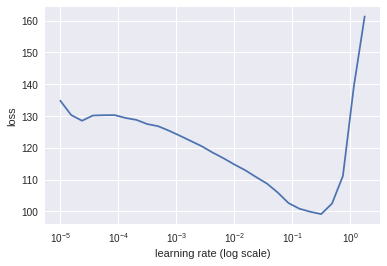

In [67]:
learn.sched.plot(0,0)

In [0]:
lr=1e-2

In [119]:
learn.fit(lr, 1, cycle_len=3,use_clr=(32,5))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      31.379425  36.239795  0.822      24.047198 
    1      29.905736  34.55851   0.842      23.252178 
    2      28.237213  34.614806  0.83       22.749285 


[array([34.61481]), 0.8299999980926513, 22.749284622192384]

In [0]:
learn.freeze_to(-2)

In [121]:
learn.lr_find()

 88%|████████▊ | 28/32 [00:29<00:04,  1.04s/it, loss=126] 

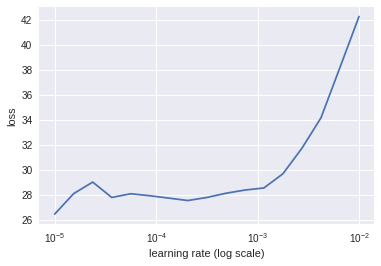

In [123]:
learn.sched.plot(0,10)

In [0]:
lr = 1e-4

In [0]:
lrs = np.array([lr/100, lr/10, lr])

In [126]:
learn.fit(lrs, 1, cycle_len=3,use_clr=(32,5))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      27.334581  35.114889  0.826      22.850966 
    1      26.585762  34.827298  0.83       22.789143 
    2      26.083476  34.211193  0.832      22.534154 


[array([34.21119]), 0.8320000014305114, 22.534154098510744]

In [0]:
learn.unfreeze()

In [128]:
learn.fit(lrs/10, 1, cycle_len=5,use_clr=(32,5))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      26.402556  34.885335  0.84       22.631252 
    1      25.705214  34.561115  0.834      22.53919  
    2      25.761591  34.650202  0.836      22.476424 
    3      25.629511  34.78727   0.836      22.629238 
    4      25.736196  34.529032  0.84       22.485714 


[array([34.52903]), 0.8400000028610229, 22.485713806152344]

In [0]:
learn.save('model_bbox_clf')

In [0]:
x,_ = next(iter(md.val_dl))
preds = learn.predict()

In [131]:
preds

array([[-2.83126, -2.35034,  4.24139, ..., -3.08163, -5.60177, -6.23805],
       [-0.48953, -2.36535,  2.22716, ...,  8.81368, -6.53596, -2.18969],
       [-1.33888, -1.94739,  2.81856, ...,  0.30329, -3.36853, -3.15667],
       ...,
       [ 0.56401, -0.76215,  1.5357 , ..., -1.39607, -0.1676 , -0.31254],
       [-1.60262, -2.1586 ,  2.378  , ..., -1.10158, -2.80876, -4.89393],
       [-1.91755, -2.60895,  3.12625, ...,  2.55406, -6.96216, -6.07432]], dtype=float32)

In [0]:
from scipy.special import expit

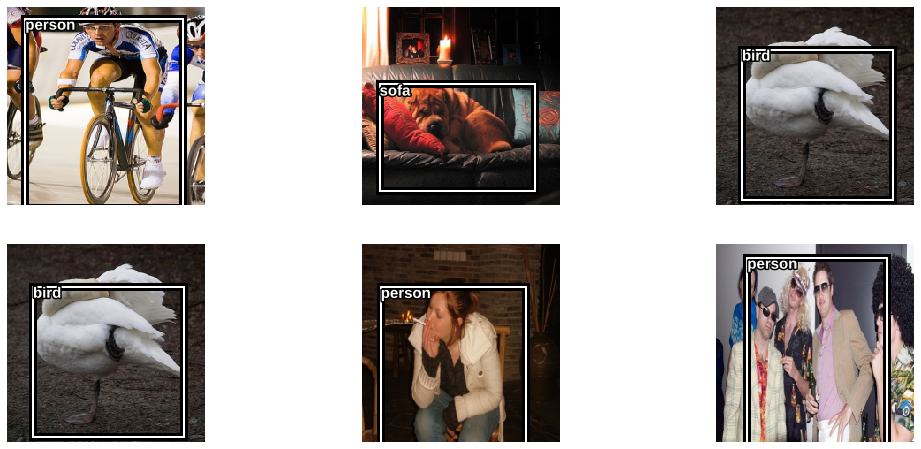

In [134]:
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize = (18,8))
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        img = md.val_ds.ds.denorm(x)[n_rows*i+j]
        bb = expit(preds[n_rows*i+j][:4]) * 244
        txt = np.argmax(preds[n_rows*i+j][4:])
        ax = show_img(img,ax = col)
        draw_rect(ax,hw_bb(bb))
        draw_outline(ax.text(*bb[:2][::-1],md2.classes[txt],verticalalignment='top', color='white', fontsize=15, weight='bold'),3)

[ 13.58056  21.23753 240.53922 209.76205]


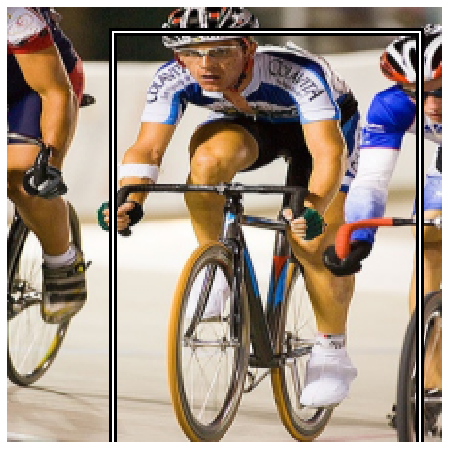

In [136]:
bb = expit(preds[0][:4]) * 244
print(bb)
img = md.val_ds.ds.denorm(x)[0]
ax = show_img(img)
draw_rect(ax,hw_bb([ 12.37456 ,53.75003 ,226.94847,212.1622]))